In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1>Import Important Library</h1>

In [2]:
# important labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy
import re
import os
import string
import nltk
import seaborn as sns


from nltk.stem import WordNetLemmatizer

nlp = spacy.load('en_core_web_sm')

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.probability import FreqDist



from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')



lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import files
uploaded = files.upload()

import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip fake-and-real-news-dataset.zip -d news_dataset

path = "/content/news_dataset"




Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.06GB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: news_dataset/Fake.csv   
  inflating: news_dataset/True.csv   


In [4]:
os.listdir(path)

['True.csv', 'Fake.csv']

In [5]:
fake_data = pd.read_csv(os.path.join(path,'Fake.csv'))
true_data = pd.read_csv(os.path.join(path,'True.csv'))

In [6]:
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [7]:
true_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [8]:
fake_data['label']=0
true_data['label']=1

In [9]:
data_set=pd.concat([true_data,fake_data], ignore_index=True)

In [10]:
data_set

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  label  
0      December 31, 2017       1  
1      December 29, 2017       1  
2      December 31, 2017       1  
3      December 30, 2017       1  
4      December 29, 2017       1  
...                   ...    ...  
44893    January 16, 2016      0  
44894    January 16, 2016      0  
44895    January 15, 2016      0  
44896    January 14, 2016      0  
44897    January 12, 2016      0  

[44898 rows x 5 columns]

In [11]:
# Shape of all datasets
print("Shape of Dataset merged: ",data_set.shape)
print("Shape of True dataset: ",true_data.shape)
print("Shape of Fake Dataset: ",fake_data.shape)

Shape of Dataset merged:  (44898, 5)
Shape of True dataset:  (21417, 5)
Shape of Fake Dataset:  (23481, 5)


<h1>EDA
</h1>

In [12]:
null_values=data_set.isna().sum()
print(null_values)

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [13]:

stop_words1 = nlp.Defaults.stop_words
stop_words2 = stopwords.words('english')
stop_words = set(stop_words1) | set(stop_words2)

custom_stopwords = set([
    'said','one','also','would','could','people','say','may','actually',
    'let','include','much','might','put','look','think','time','new',
    'far','way','well','man','according','took','somthing','seem','wasnt'
])

all_stopwords = stop_words.union(custom_stopwords)

In [14]:
fake_text=" ".join(fake_data['text'].astype('str'))
true_text=" ".join(true_data['text'].astype('str'))

In [15]:
fake_text = fake_text.lower()
true_text = true_text.lower()

import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
# stopwords removal
fake_text=[words for words in word_tokenize(fake_text) if  words.isalpha() and words not in all_stopwords]
fake_text=" ".join(fake_text)

true_text=[words for words in word_tokenize(true_text) if  words.isalpha() and words not in all_stopwords]
true_text=" ".join(true_text)


In [17]:
len(fake_text)

34533935

In [18]:
fake_title=" ".join(fake_data['title'].astype('str'))
true_title=" ".join(true_data['title'].astype('str'))

fake_title=fake_title.lower()
true_title=fake_title.lower()



In [19]:
fake_title=[words for words in word_tokenize(fake_title) if  words.isalpha() and words not in all_stopwords]
fake_title=" ".join(fake_title)

true_title=[words for words in word_tokenize(true_title) if  words.isalpha() and words not in all_stopwords]
true_title=" ".join(true_title)


In [20]:
## data re sub huhwufb

def clean_text(text):
    # Expand common contractions
    text = re.sub(r"\bi m\b", "i am", text)
    text = re.sub(r"\bhe s\b", "he is", text)
    text = re.sub(r"\bshe s\b", "she is", text)
    text = re.sub(r"\bthat's\b", "that is", text)
    text = re.sub(r"\bwhat's\b", "what is", text)
    text = re.sub(r"\bwhere's\b", "where is", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\bwon't\b", "will not", text)
    text = re.sub(r"\bcan't\b", "cannot", text)


    text = re.sub(r"[-()%&*$#@!+/{}?.,:]", "", text)


    text = re.sub(r"\s+", " ", text).strip()


    doc = nlp(text)
    string = ""
    for token in doc:
        if token.text.lower() not in all_stopwords and token.is_alpha:
            string += token.lemma_ + " "

    return string.strip()

<h1>Data Visuals</h1>

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

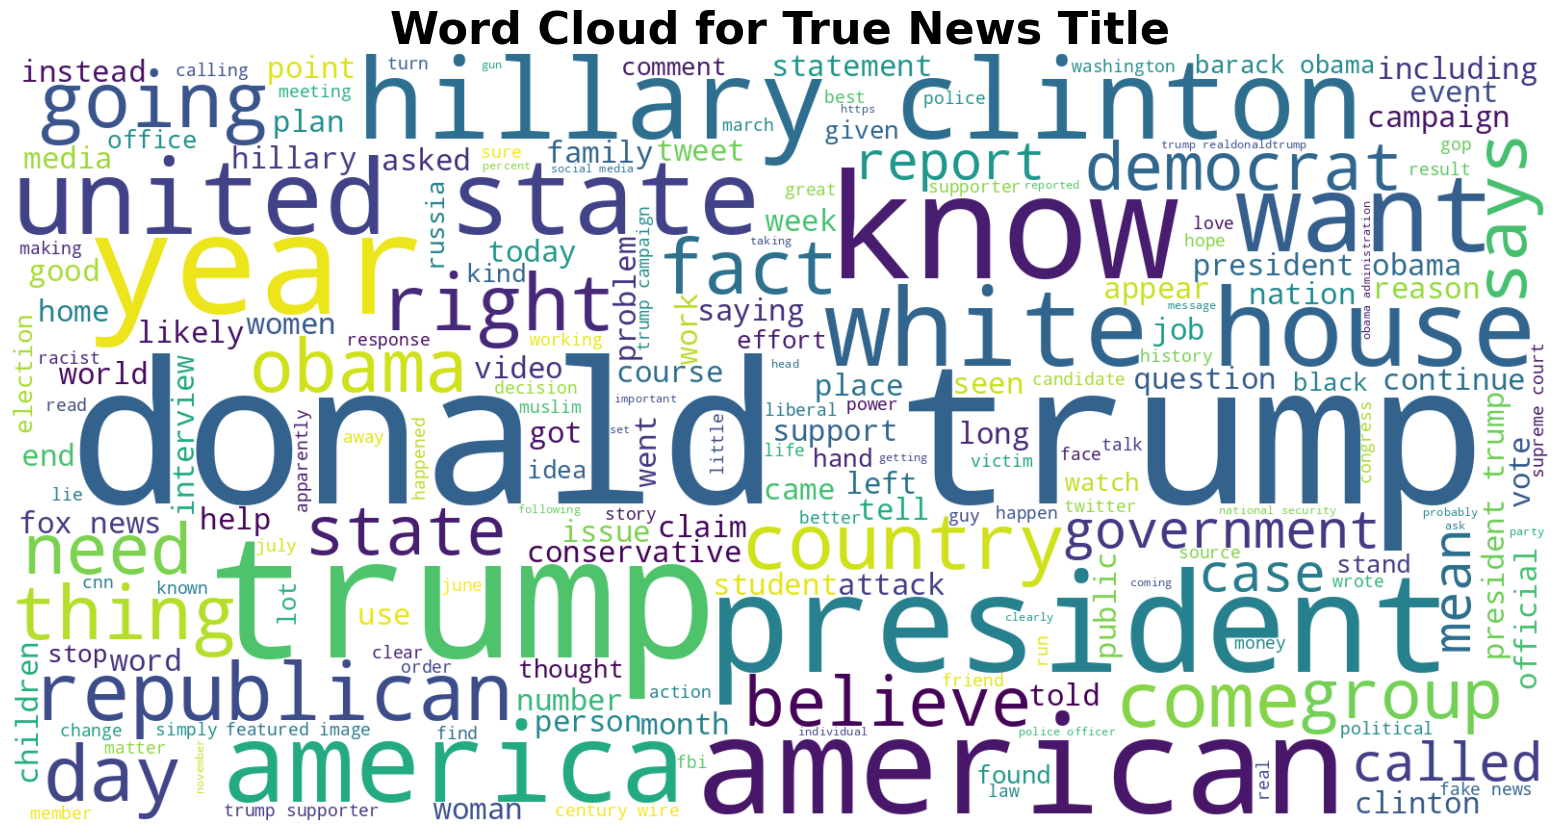

In [22]:



wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(fake_text)

# Plot the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News Title',
          fontsize=32,
          fontweight='bold',
          color='black')
plt.show()

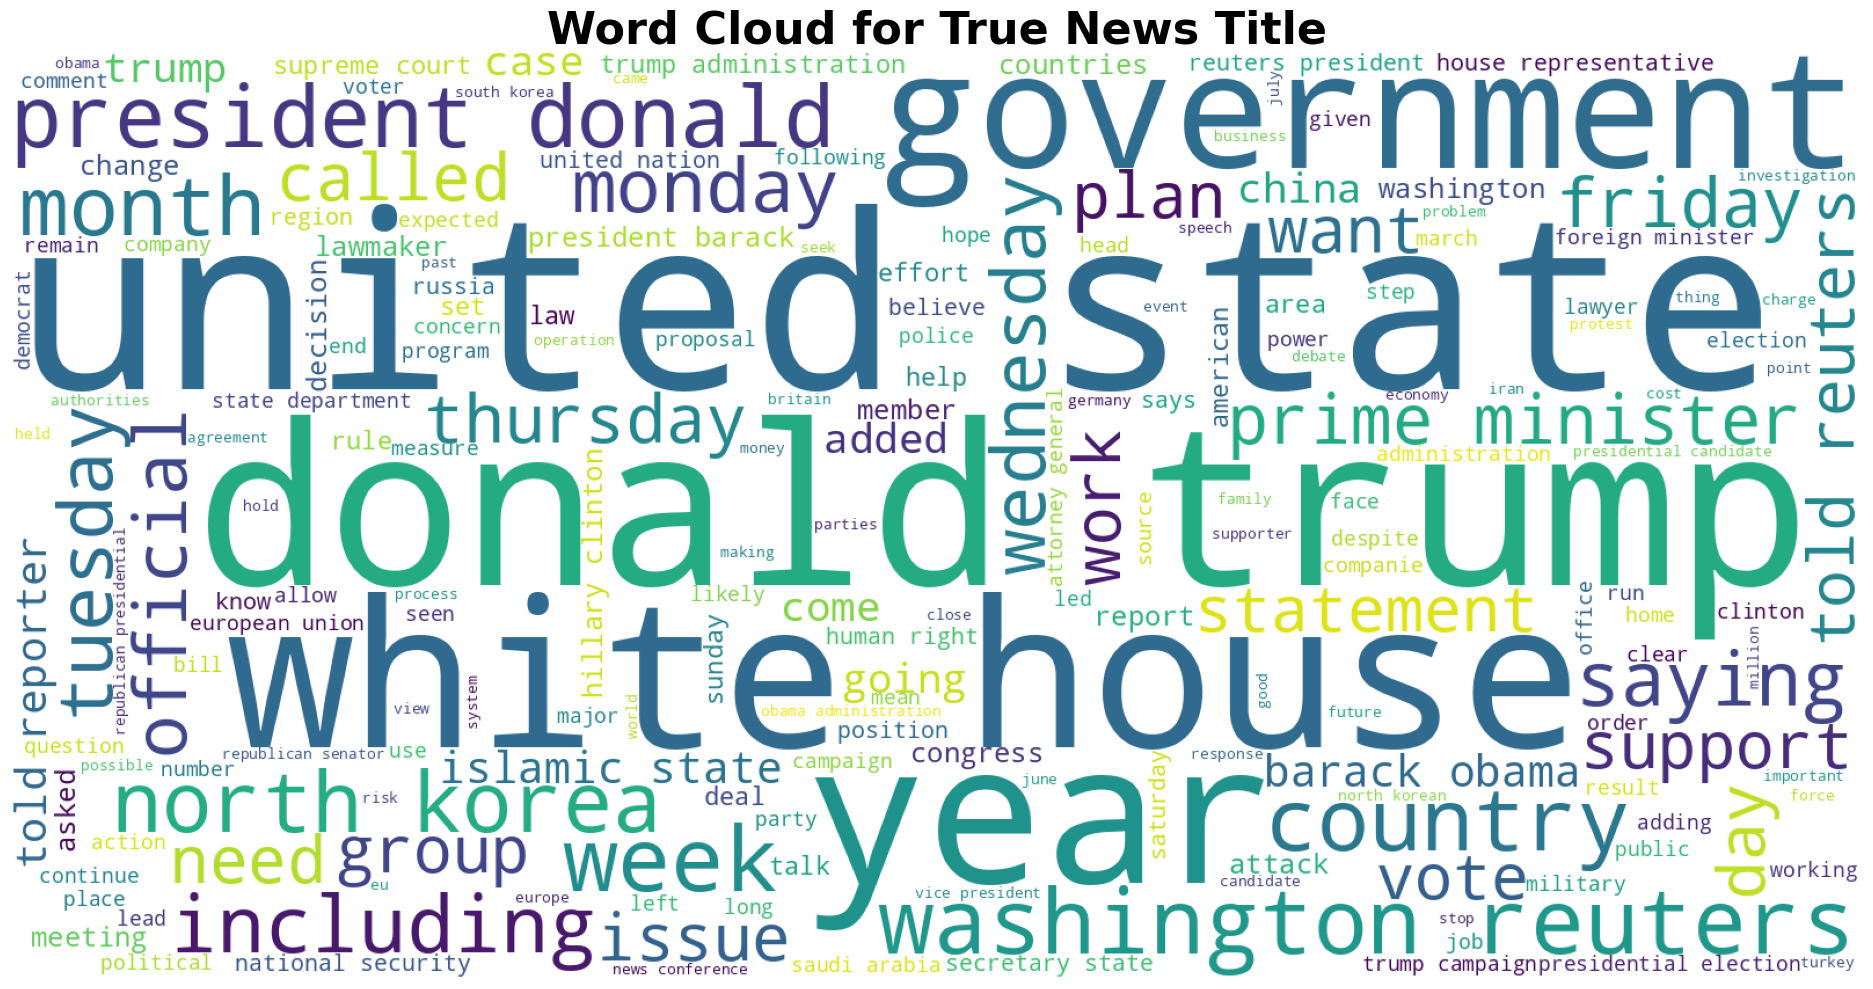

In [23]:
word_cloud=WordCloud(width=1600,height=800,background_color='white').generate(true_text)

#plot

plt.figure(figsize=(20,10))
plt.imshow(word_cloud,)
plt.axis('off')
plt.title('Word Cloud for True News Title',
          fontsize=32,
          fontweight='bold',
          color='black')
plt.tight_layout()
plt.show()

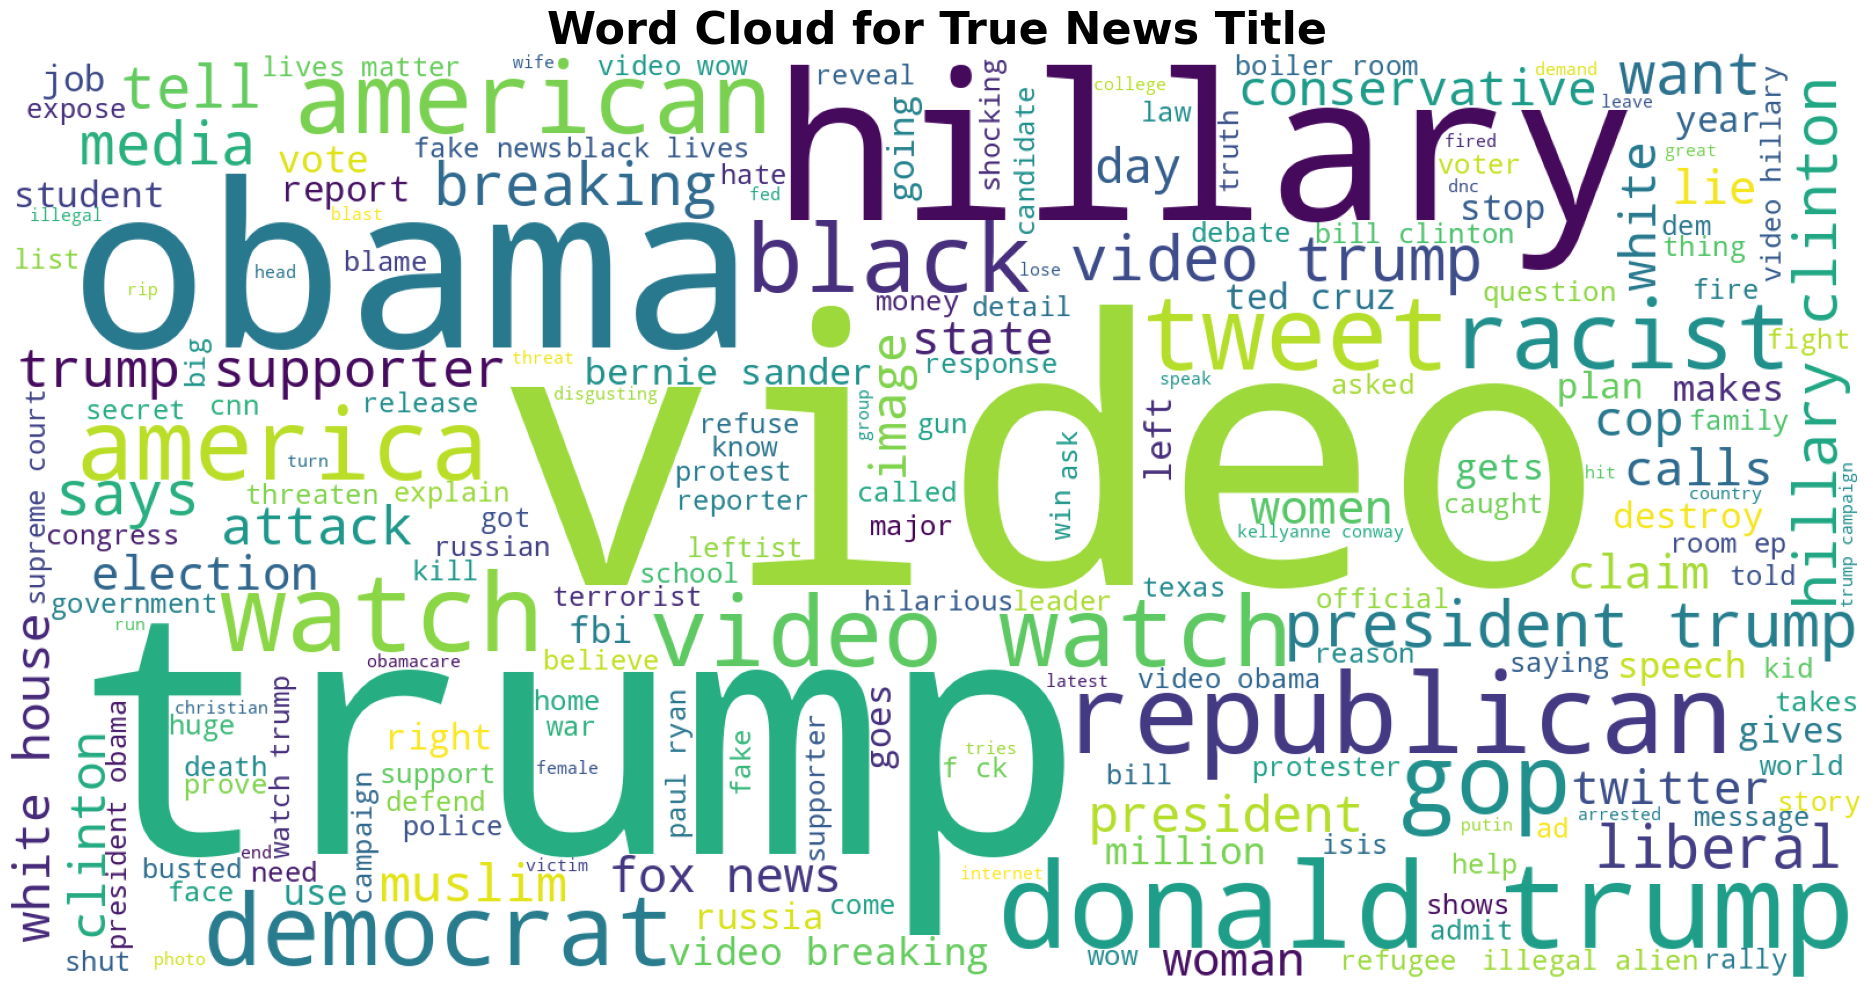

In [24]:
word_cloud=WordCloud(width=1600,height=800,background_color='white').generate(fake_title)

#plot

plt.figure(figsize=(20,10))
plt.imshow(word_cloud,)
plt.axis('off')
plt.title('Word Cloud for True News Title',
          fontsize=32,
          fontweight='bold',
          color='black')
plt.tight_layout()
plt.show()

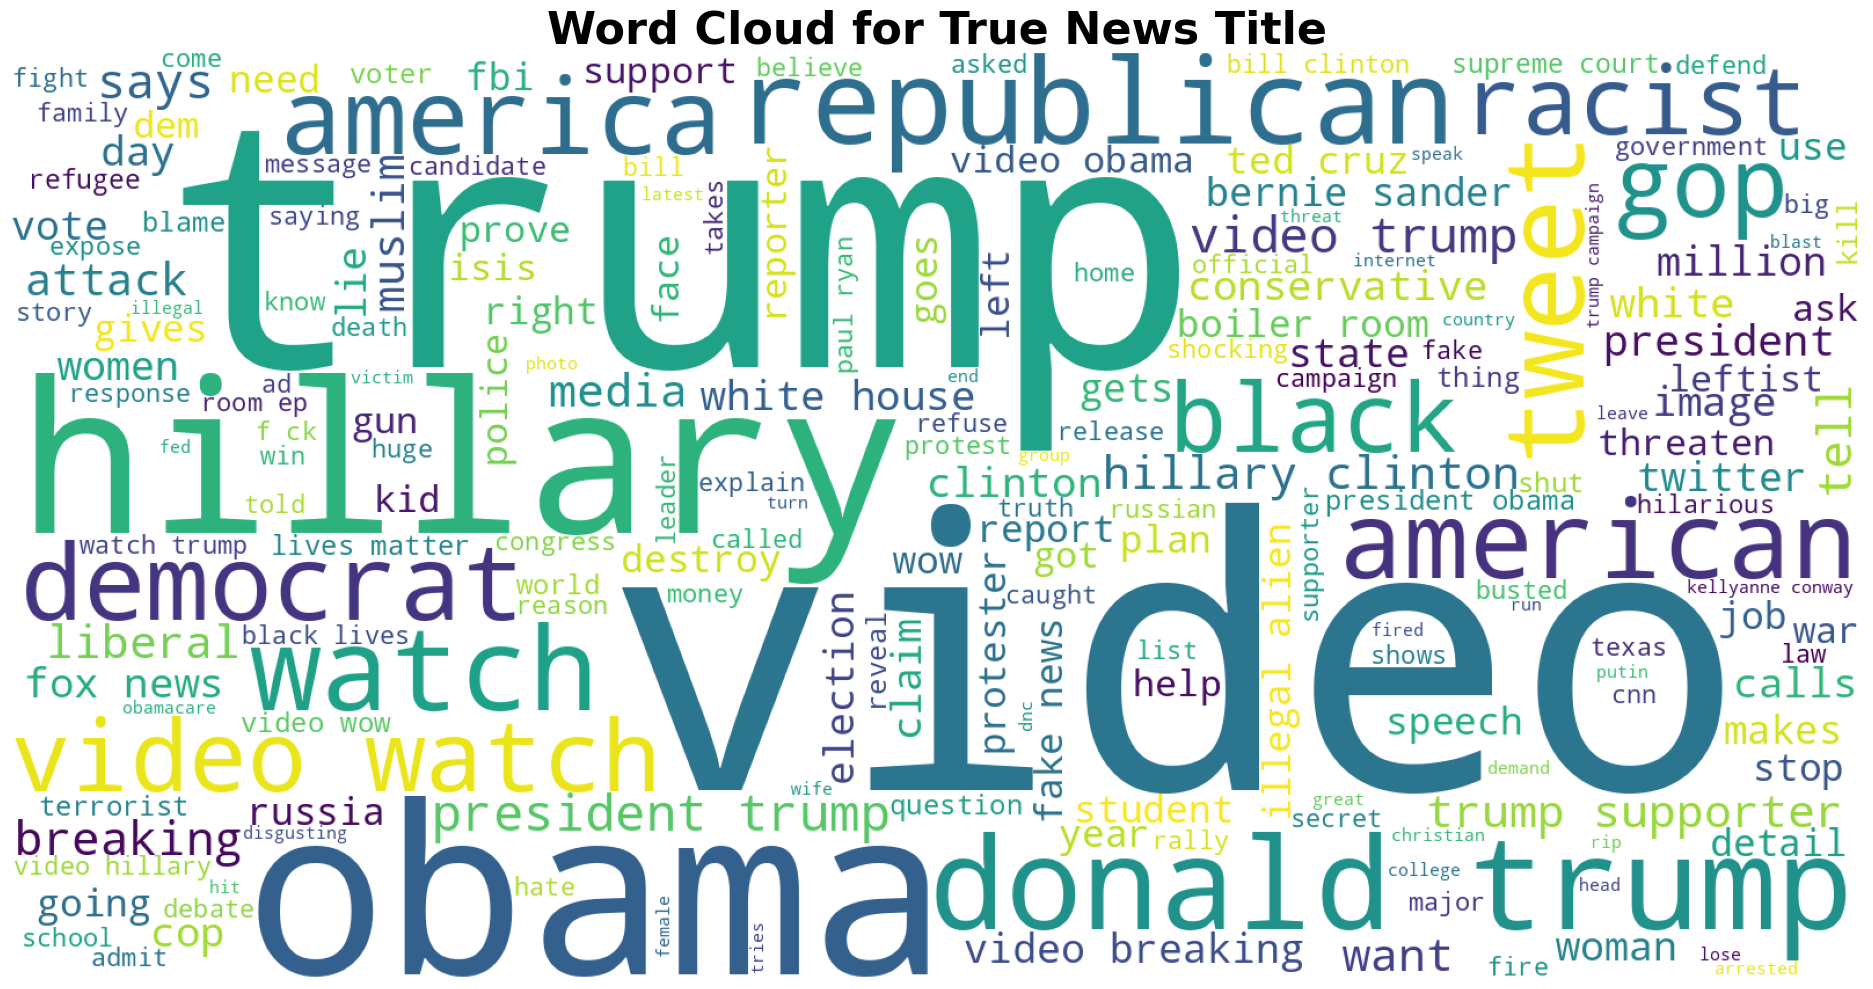

In [25]:
word_cloud=WordCloud(width=1600,height=800,background_color='white').generate(true_title)

#plot

plt.figure(figsize=(20,10))
plt.imshow(word_cloud,)
plt.axis('off')
plt.title('Word Cloud for True News Title',
          fontsize=32,
          fontweight='bold',
          color='black')
plt.tight_layout()
plt.show()

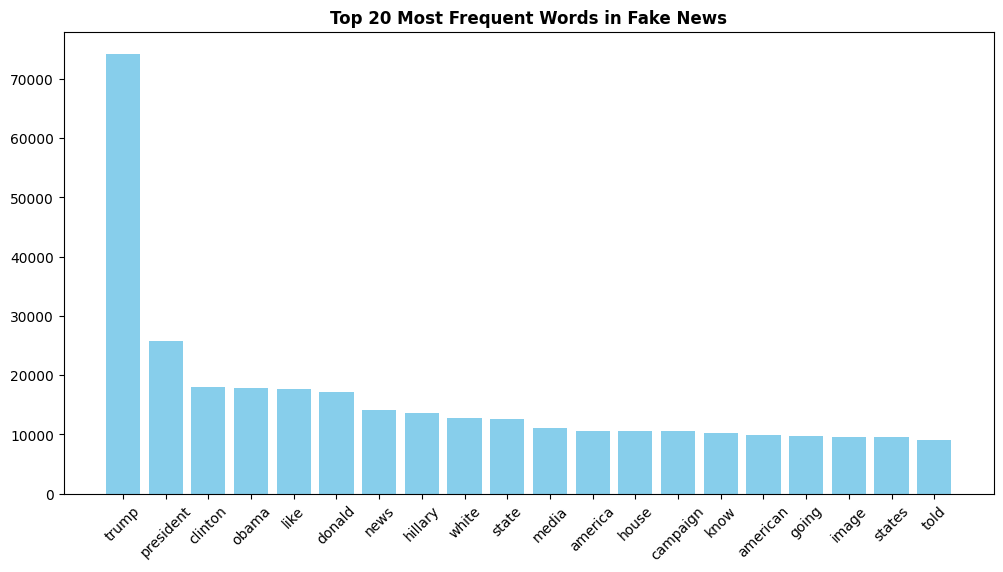

In [26]:
tokens = [word for word in fake_text.split() if word.isalpha() and word not in all_stopwords]
fdist = FreqDist(tokens)
top_words = pd.DataFrame(fdist.most_common(20), columns=['Word', 'Count'])

plt.figure(figsize=(12,6))
plt.bar(top_words['Word'], top_words['Count'], color='skyblue')
plt.title('Top 20 Most Frequent Words in Fake News',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

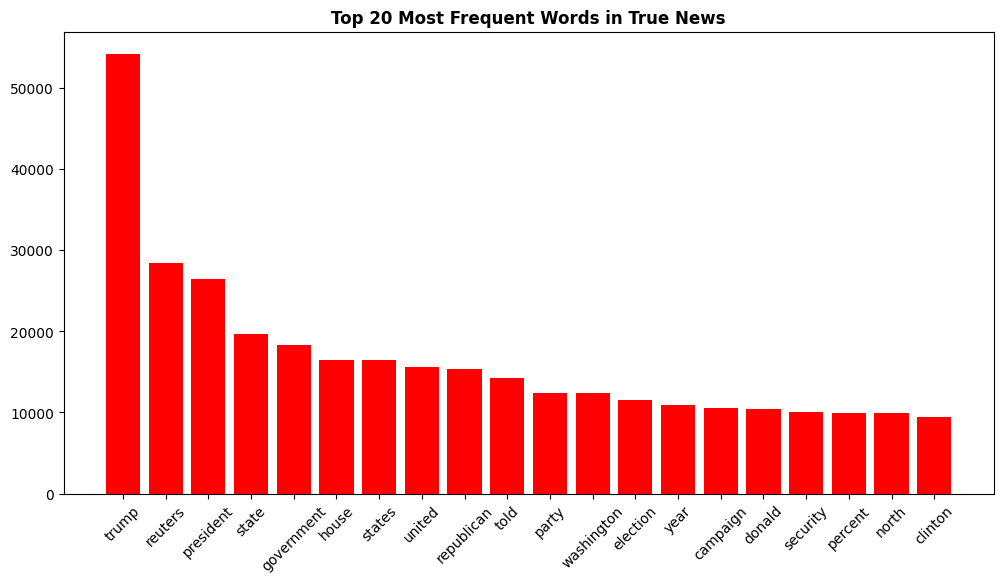

In [27]:
tokens = [word for word in true_text.split() if word.isalpha() and word not in all_stopwords]
fdist = FreqDist(tokens)
top_words = pd.DataFrame(fdist.most_common(20), columns=['Word', 'Count'])

plt.figure(figsize=(12,6))
plt.bar(top_words['Word'], top_words['Count'], color='red')
plt.title('Top 20 Most Frequent Words in True News' ,fontweight='bold')
plt.xticks(rotation=45)
plt.show()

<h1>Data Cleaning Part</h1>

In [28]:
data_set=data_set[['text','label']]

In [29]:
data_set

text  label
0      WASHINGTON (Reuters) - The head of a conservat...      1
1      WASHINGTON (Reuters) - Transgender people will...      1
2      WASHINGTON (Reuters) - The special counsel inv...      1
3      WASHINGTON (Reuters) - Trump campaign adviser ...      1
4      SEATTLE/WASHINGTON (Reuters) - President Donal...      1
...                                                  ...    ...
44893  21st Century Wire says As 21WIRE reported earl...      0
44894  21st Century Wire says It s a familiar theme. ...      0
44895  Patrick Henningsen  21st Century WireRemember ...      0
44896  21st Century Wire says Al Jazeera America will...      0
44897  21st Century Wire says As 21WIRE predicted in ...      0

[44898 rows x 2 columns]

In [30]:
blanks = []

for index, wrd in data_set['text'].items():  # Use .items() in new Pandas versions
    if isinstance(wrd, str) and wrd.isspace():
        blanks.append(index)

print(blanks[1])

32340


In [31]:
print(data_set.shape)
print(len(blanks))

(44898, 2)
631


In [32]:
data_set.drop(blanks,inplace=True)


/tmp/ipython-input-3474401231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set.drop(blanks,inplace=True)


In [33]:
data_set.shape   #   44267+631(droped)= real data_set.shape

(44267, 2)

In [34]:
data_set['text']=data_set['text'].apply(clean_text)

/tmp/ipython-input-2836726974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['text']=data_set['text'].apply(clean_text)


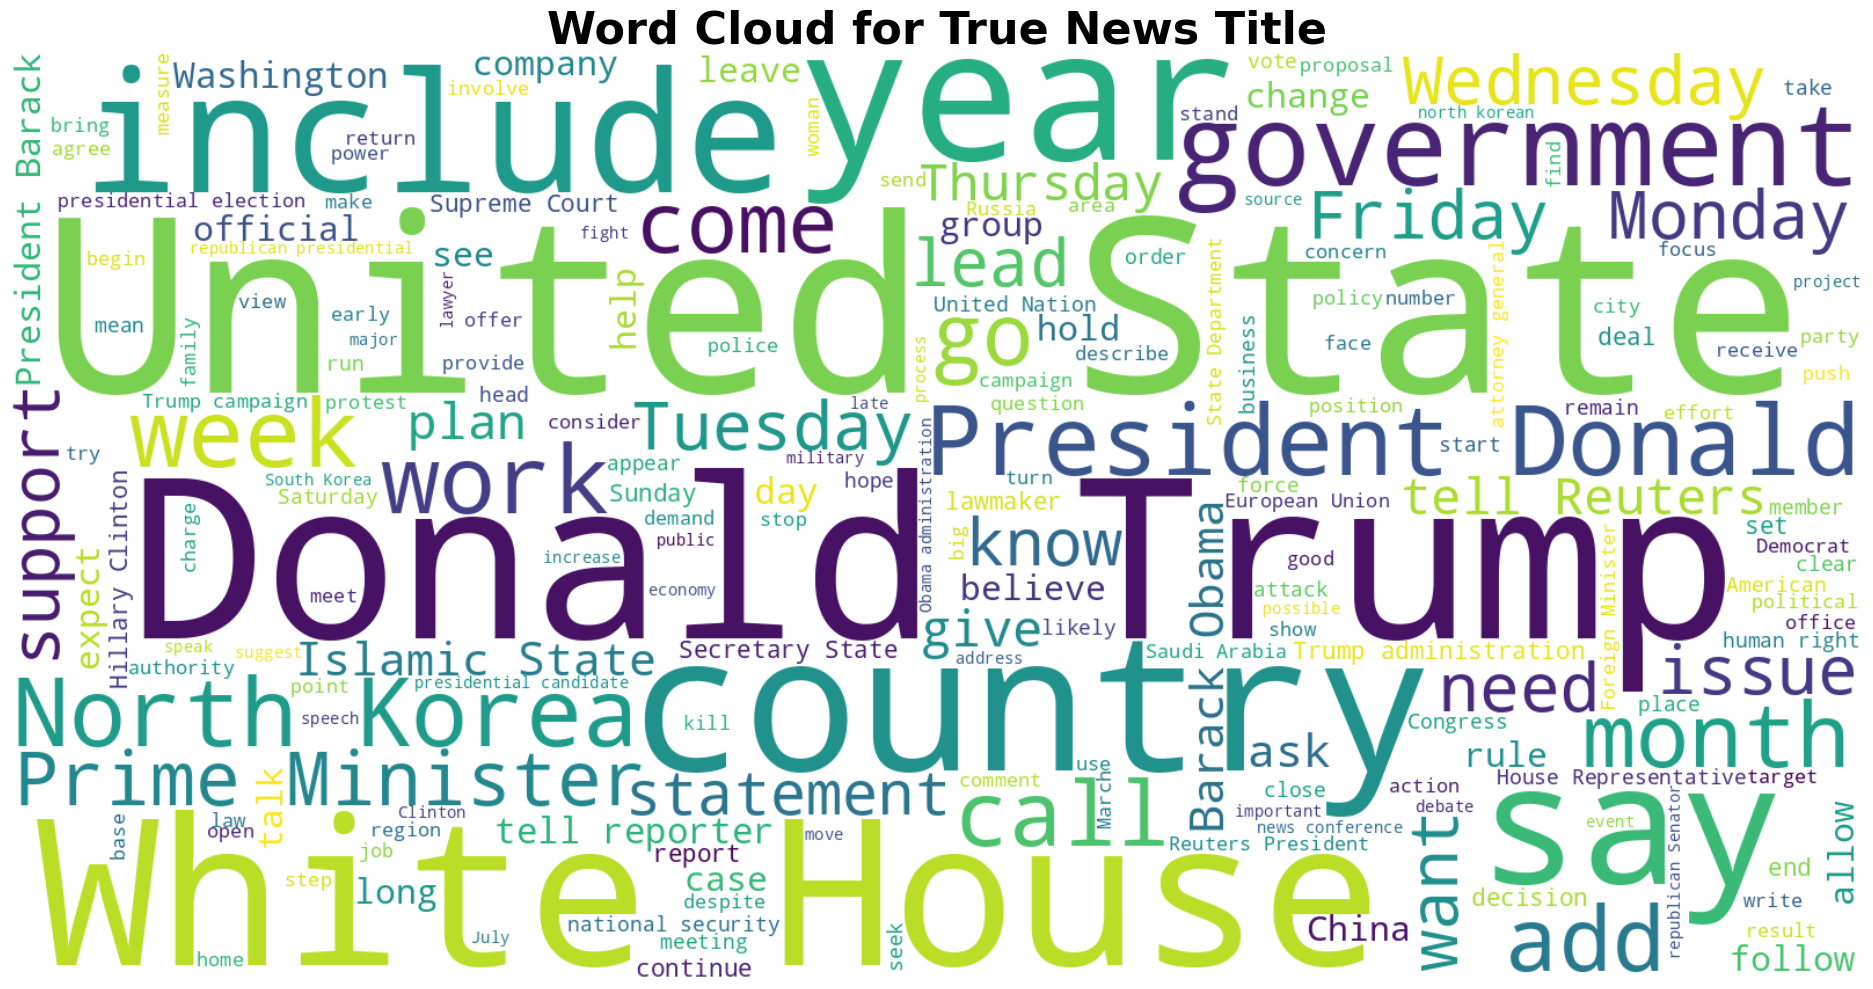

In [35]:
word_cloud=WordCloud(width=1600,height=800,background_color='white').generate("".join(data_set[data_set['label']==1].text))

#plot

plt.figure(figsize=(20,10))
plt.imshow(word_cloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for True News Title',
          fontsize=32,
          fontweight='bold',
          color='black')
plt.tight_layout()
plt.show()

In [36]:
from PIL import Image

In [40]:
fake_file = 'fake.jpeg'
true_file = 'right.jpg'


icon = Image.open(fake_file)


mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))


mask.paste(icon, box=(0, 0))


rgb_arr = np.array(mask)

print(rgb_arr.shape)

(175, 287, 3)


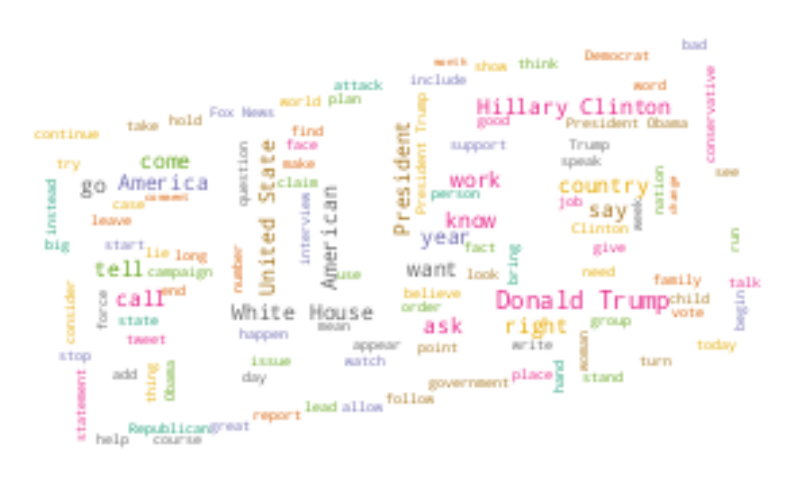

In [44]:
mask_img = Image.open("fake.jpeg").convert("L")
mask_arr = np.array(mask_img)


word_cloud = WordCloud(
    mask=mask_arr,
    width=1600,
    height=800,
    background_color="white",
    colormap="Dark2"
).generate(" ".join(data_set[data_set['label'] == 0].text))

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

Mask shape: (420, 600)


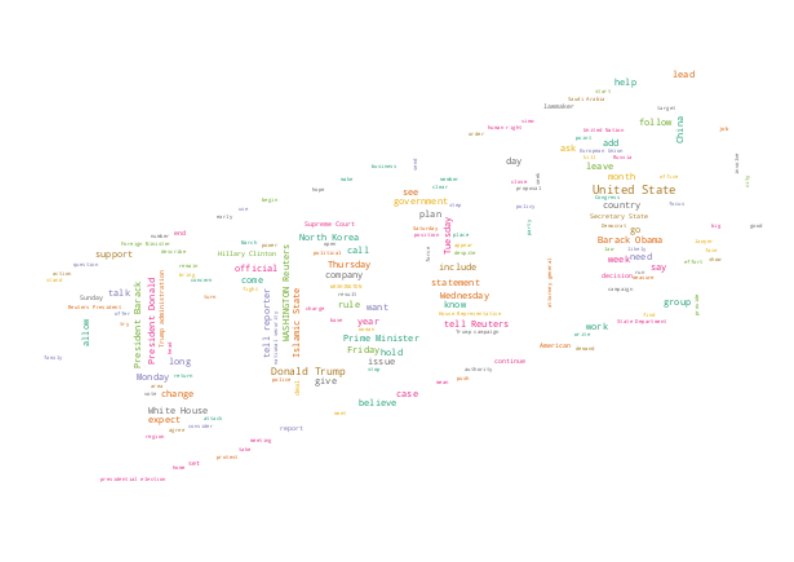

In [45]:
true_file = "right.jpg"
icon = Image.open(true_file).convert("L")
rgb_arr = np.array(icon)

print("Mask shape:", rgb_arr.shape)

text_data = " ".join(data_set[data_set['label'] == 1].text)

word_cloud = WordCloud(
    mask=rgb_arr,
    width=1600,
    height=800,
    background_color="white",
    colormap="Dark2"
).generate(text_data)


plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1>features extraction and spliting of Data </h1>

In [51]:

from sklearn.model_selection import train_test_split
X=data_set['text']
Y=data_set['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

<h1>Model Training</h1>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# TF-IDF vectorization
vectorized = TfidfVectorizer()
x_train_tfidf = vectorized.fit_transform(x_train)

# Train Linear SVM
clf = LinearSVC()
clf.fit(x_train_tfidf, y_train)

# Pipeline (TF-IDF + LinearSVC)
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])
text_clf.fit(x_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

<h1>Model Evaluation</h1>

In [52]:
from sklearn import metrics

# Predictions
prediction = text_clf.predict(x_test)

# Confusion matrix
print(confusion_matrix(y_test, prediction))

# Accuracy
print(accuracy_score(y_test, prediction))

# Classification report
print(metrics.classification_report(y_test, prediction))


[[7442   68]
 [  41 7058]]
0.9925388459169006
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7510
           1       0.99      0.99      0.99      7099

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



accuracy:   0.993


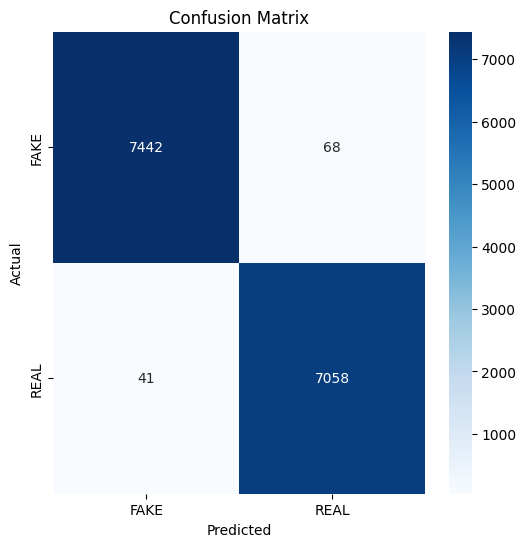

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7510
           1       0.99      0.99      0.99      7099

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



In [54]:
pred = text_clf.predict(x_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['FAKE','REAL'], yticklabels=['FAKE','REAL'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print(metrics.classification_report(y_test, pred))